In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.distributions.empirical_distribution import ECDF


# Discrete Random Variable

Let's see for the Die example, how it's PMF and CDF looks like.

Given a population, we can get it Empirical CDF function using `statsmodels` library.

We can also easily plot the Empirical CDF using `seaborn.ecdfplot`.

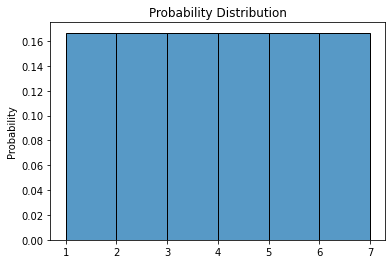

In [ ]:
# Possible outcomes, all with the same probability
die_faces = np.array([1,2,3,4,5,6])

# Probability distribution for a die (PMF)
sns.histplot(die_faces, bins=list(range(1,8)), stat='probability').set_title(f'Probability Distribution')
plt.show()

In [ ]:
# We can get the ECDF function just using:
ecdf = ECDF(die_faces)

# And now we can use it to get cumulative probabilities
# For example P(X <= 1), probability of getting at least a 1
print(ecdf(1))

# P(X <= 3), probability of getting at least a 3
print(ecdf(3))

# P(1 < X <= 4) = P(2 <= X <= 4)
ecdf(4) - ecdf(1)


0.16666666666666666
0.5


0.5

[]

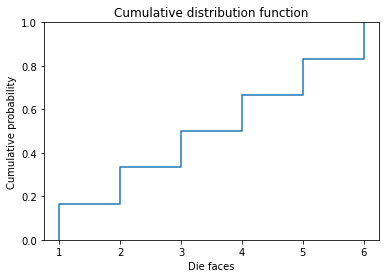

In [ ]:
# Let's plot the ECDF with Seaborn
sns.ecdfplot(die_faces).set(
    title="Cumulative distribution function",
    xlabel="Die faces",
    ylabel="Cumulative probability",
)
plt.plot()

[]

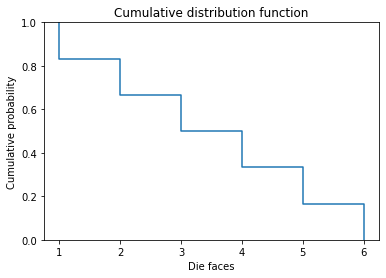

In [ ]:
# Let's plot the ECDF with Seaborn
sns.ecdfplot(die_faces, complementary=True).set(
    title="Cumulative distribution function",
    xlabel="Die faces",
    ylabel="Cumulative probability",
)
plt.plot()

### Discrete Random Variable and Messi stats

In [ ]:
messi_stats = pd.read_csv("https://raw.githubusercontent.com/anyoneai/notebooks/main/datasets/lionel_messi_events_stats.csv")
messi_stats

,Unnamed: 0,id_odsp,link_odsp,adv_stats,date,league,season,country,ht,at,...,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
0,9142,2mfCxQlt/,/soccer/spain/primera-division-2011-2012/barce...,True,2011-08-29,SP1,2012,spain,Barcelona,Villarreal,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,None,NaN,0.0
1,9147,2mfCxQlt/,/soccer/spain/primera-division-2011-2012/barce...,True,2011-08-29,SP1,2012,spain,Barcelona,Villarreal,...,NaN,NaN,Bottom left corner,On target,0.0,Difficult angle on the left,left foot,Pass,Open play,0.0
2,9151,2mfCxQlt/,/soccer/spain/primera-division-2011-2012/barce...,True,2011-08-29,SP1,2012,spain,Barcelona,Villarreal,...,NaN,NaN,Bottom right corner,On target,0.0,Outside the box,left foot,None,Open play,0.0
3,9155,2mfCxQlt/,/soccer/spain/primera-division-2011-2012/barce...,True,2011-08-29,SP1,2012,spain,Barcelona,Villarreal,...,NaN,NaN,NaN,NaN,0.0,Attacking half,NaN,None,NaN,0.0
4,9164,2mfCxQlt/,/soccer/spain/primera-division-2011-2012/barce...,True,2011-08-29,SP1,2012,spain,Barcelona,Villarreal,...,NaN,NaN,NaN,NaN,0.0,Attacking half,NaN,None,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,940475,G0pLytmF/,/soccer/spain/laliga/eibar-barcelona-G0pLytmF/,True,2017-01-22,SP1,2017,spain,Eibar,Barcelona,...,NaN,NaN,NaN,NaN,0.0,Attacking half,NaN,None,NaN,0.0
1464,940476,G0pLytmF/,/soccer/spain/laliga/eibar-barcelona-G0pLytmF/,True,2017-01-22,SP1,2017,spain,Eibar,Barcelona,...,NaN,NaN,Bottom left corner,On target,0.0,Outside the box,left foot,None,Open play,0.0
1465,940478,G0pLytmF/,/soccer/spain/laliga/eibar-barcelona-G0pLytmF/,True,2017-01-22,SP1,2017,spain,Eibar,Barcelona,...,NaN,NaN,Blocked,Blocked,0.0,Outside the box,left foot,Pass,Open play,0.0
1466,940500,G0pLytmF/,/soccer/spain/laliga/eibar-barcelona-G0pLytmF/,True,2017-01-22,SP1,2017,spain,Eibar,Barcelona,...,NaN,NaN,Bottom left corner,On target,1.0,Centre of the box,left foot,Through ball,Open play,0.0


In [ ]:
goals_per_match = messi_stats.groupby(["id_odsp", "season"])["is_goal"].sum().reset_index()
goals_per_match

,id_odsp,season,is_goal
0,04Oyn4RO/,2015,2.0
1,0OeqlZA6/,2012,0.0
2,0QBZCHft/,2013,2.0
3,0bPZmM0C/,2014,0.0
4,0dwru1ko/,2012,1.0
...,...,...,...
173,zRKLbCHu/,2013,0.0
174,zet5dC15/,2015,2.0
175,zgVowLdC/,2016,0.0
176,zkJ8cNx3/,2013,2.0


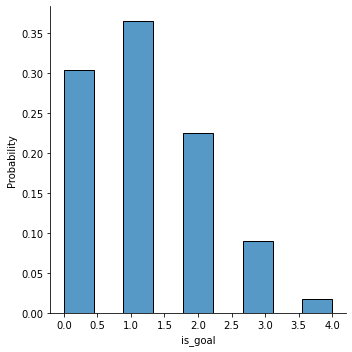

In [ ]:
# Let's take a look at the Empiricail PMF
sns.displot(data=goals_per_match, x="is_goal", stat="probability")
plt.show()

[]

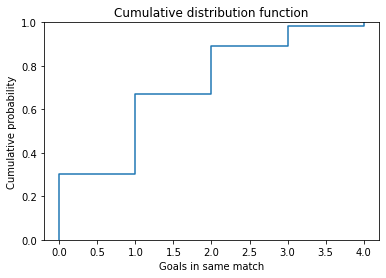

In [ ]:
# And let's also check its Empiricail CDF
sns.ecdfplot(data=goals_per_match, x="is_goal").set(
    title="Cumulative distribution function",
    xlabel="Goals in same match",
    ylabel="Cumulative probability",
)
plt.plot()

[]

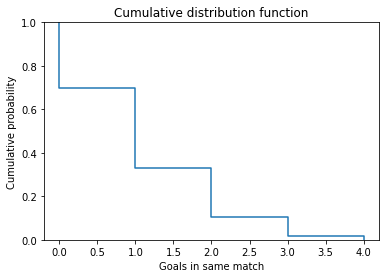

In [ ]:
# And let's also check its Empiricail CDF
sns.ecdfplot(data=goals_per_match, x="is_goal", complementary=True).set(
    title="Cumulative distribution function",
    xlabel="Goals in same match",
    ylabel="Cumulative probability",
)
plt.plot()

In [ ]:
# And we can modelate the ECDF
ecdf_messi_goals = ECDF(goals_per_match.is_goal)

# And now we can use it to get cumulative probabilities
# For example P(X <= 1), probability of scoring at least a 1 goal
print(ecdf_messi_goals(1))

# P(X <= 3), probability of scoring at least 3 goals
print(ecdf_messi_goals(3))

# P(X > 0), probability of scoring 1 or more goals ???
ecdf_messi_goals(4) - ecdf_messi_goals(0)

0.6685393258426966
0.9831460674157303


0.696629213483146

In [ ]:
ecdf_messi_goals(4)

1.0

# Continuous Random Variable

Now let's look at a famous dataset about Heart Disease to work with Continuous Random Variables.

- This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V.
- It contains 14 attributes.
- The "target" field refers to the presence of heart disease in the patient. It is integer valued *0 = no disease* and *1 = disease*.


In [ ]:
heart = pd.read_csv("https://raw.githubusercontent.com/anyoneai/notebooks/main/datasets/heart.csv")
heart

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


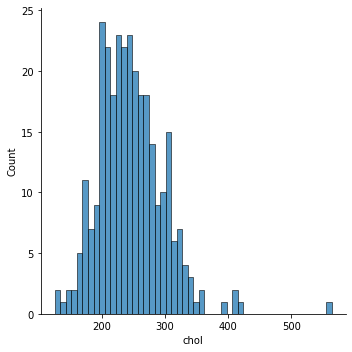

In [ ]:
# Let's look at the cholesterol variable (chol)
sns.displot(data=heart, x="chol", kind='hist', bins=50)

In [ ]:
# We can comput the empirical mean and
# standard deviation using Numpy
heart["chol"].mean(), heart["chol"].std()

(246.26402640264027, 51.83075098793003)

In [ ]:
# Now we can use Scipy.stats.norm to create a normal random variable
# from our sample mean and std
X = stats.norm(loc=heart["chol"].mean(), scale=heart["chol"].std())

# What is the probability of the value lying in the interval [250,200]?
X.cdf(250) - X.cdf(200)

0.34269474270761285

We can also use Matplotlib/Seaborn to plot our Normal distribution PDF and compare with the sample distribution.

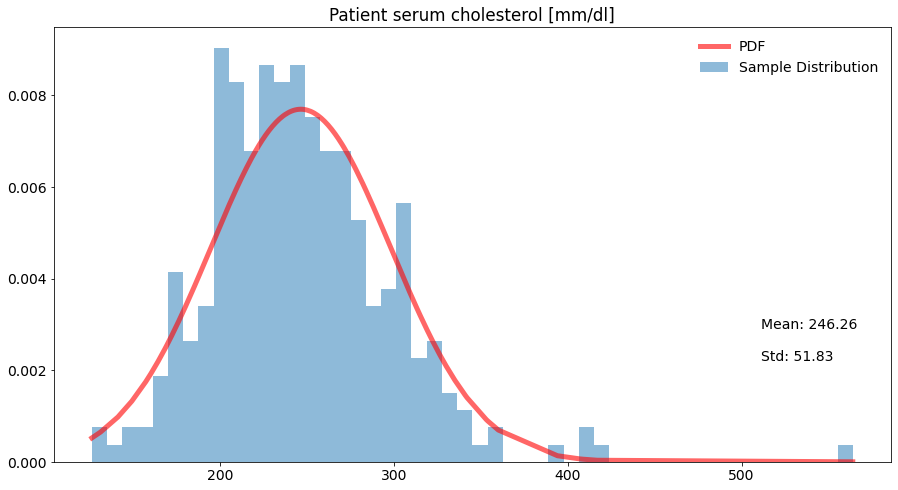

In [ ]:
plt.rcParams['figure.figsize'] = 15, 8
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(1, 1)

x = heart["chol"].sort_values()
ax.plot(x, X.pdf(x), 'r-', lw=5, alpha=0.6, label="PDF")
ax.hist(x, bins=50, density=True, histtype='stepfilled', alpha=0.5, label="Sample Distribution")

ax.legend(loc='best', frameon=False)
plt.figtext(.78, .3, f'Mean: {heart["chol"].mean():.2f}\n\nStd: {heart["chol"].std():.2f}')
plt.title("Patient serum cholesterol [mm/dl]")
plt.show()
